Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

Using TensorFlow backend.


# LOADING DATA

In [2]:
data = pd.read_csv("Desktop\heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


About the data:

- age: Age of the patient
- anaemia: If the patient had the haemoglobin below the normal range
- creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
- diabetes: If the patient was diabetic
- ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
- high_blood_pressure: If the patient had hypertension
- platelets: Platelet count of blood in kiloplatelets/mL
- serum_creatinine: The level of serum creatinine in the blood in mg/dL
- serum_sodium: The level of serum sodium in the blood in mEq/L
- sex: The sex of the patient
- smoking: If the patient smokes actively or ever did in past
- time: It is the time of the patient's follow-up visit for the disease in months
- DEATH_EVENT: If the patient deceased during the follow-up period

# DATA ANALYSIS

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

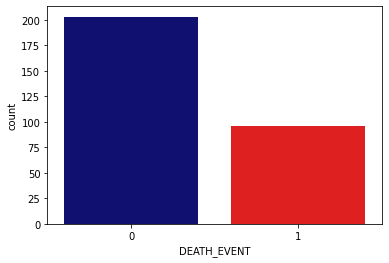

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols = ["#000080","#FF0000"]
sns.countplot(x = data["DEATH_EVENT"], palette = cols)

<AxesSubplot:>

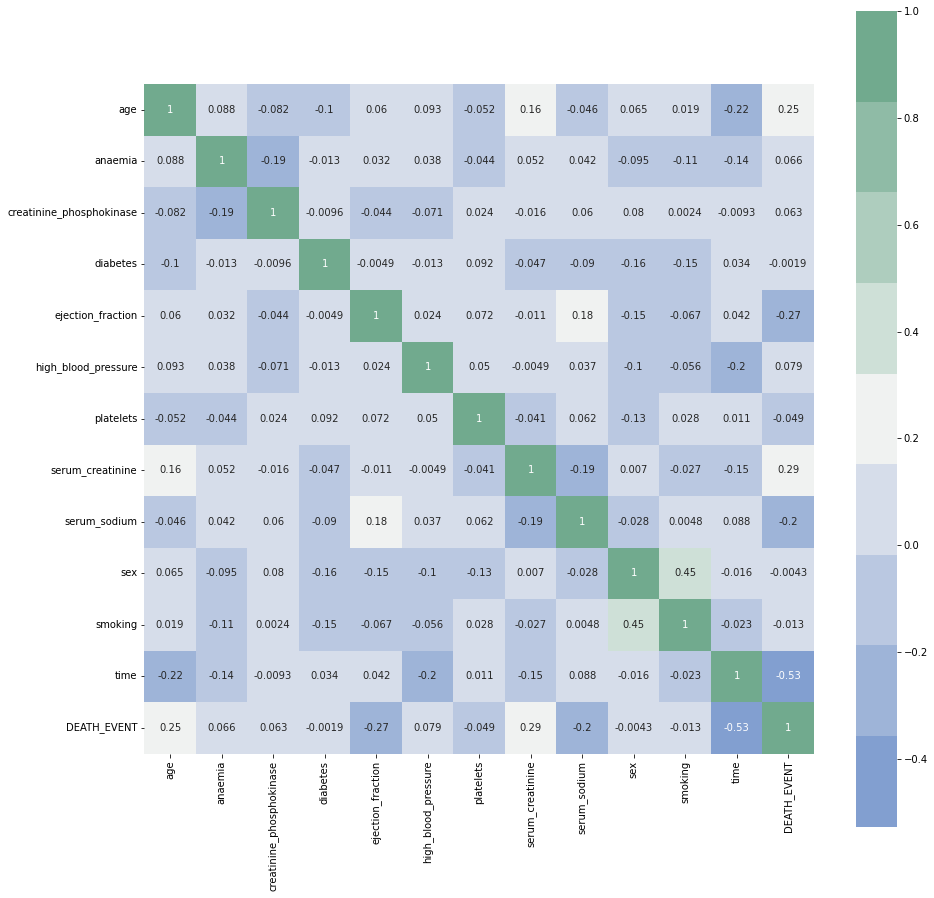

In [35]:
cmap = sns.diverging_palette(250,150, s=50, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)

- Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and      treatment reduces the chances of any fatality. It holds and inverse relation.
- Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
- Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing

ERROR! Session/line number was not unique in database. History logging moved to new session 47


Text(0.5, 1.0, 'Distribution Of Age')

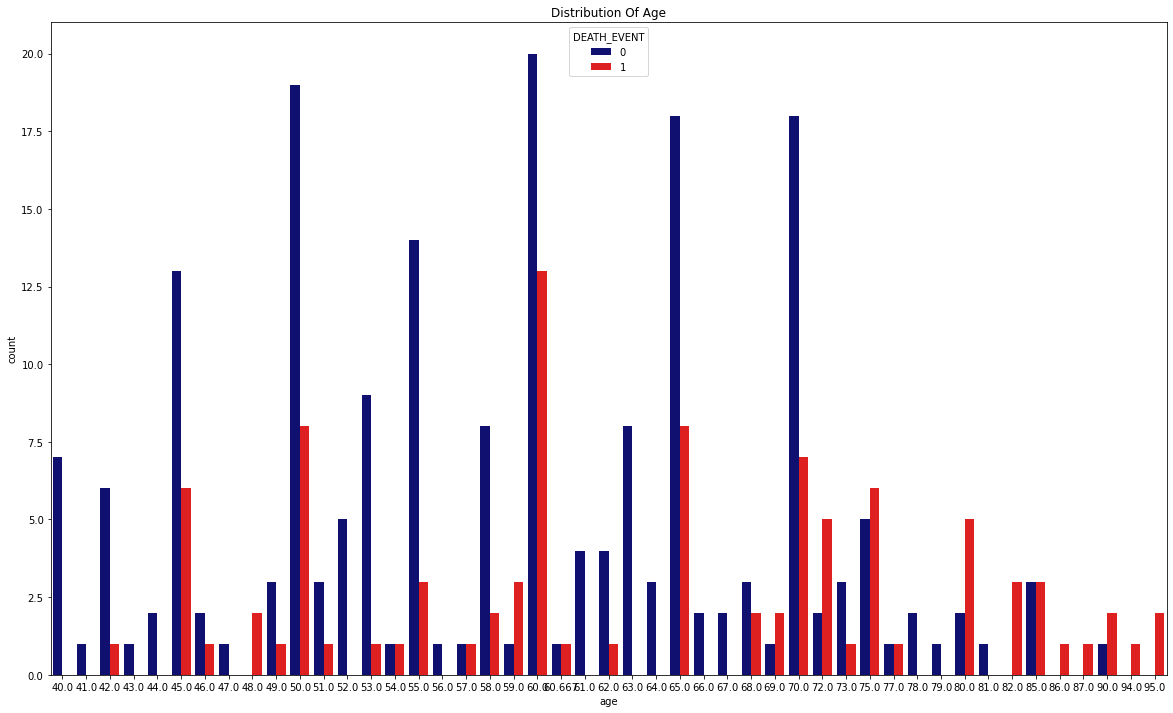

In [8]:
#Evaluating age distribution 
plt.figure(figsize=(20,12))
Days_of_weeks = sns.countplot(x = data["age"], data=data, hue = "DEATH_EVENT", palette = cols)
Days_of_weeks.set_title("Distribution Of Age")

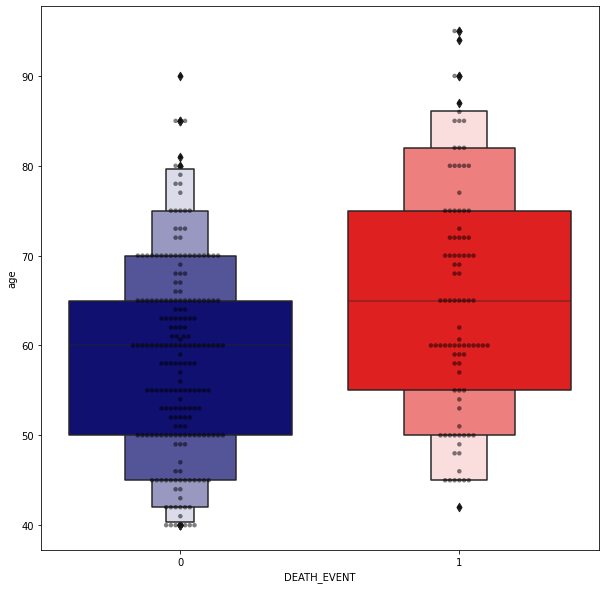

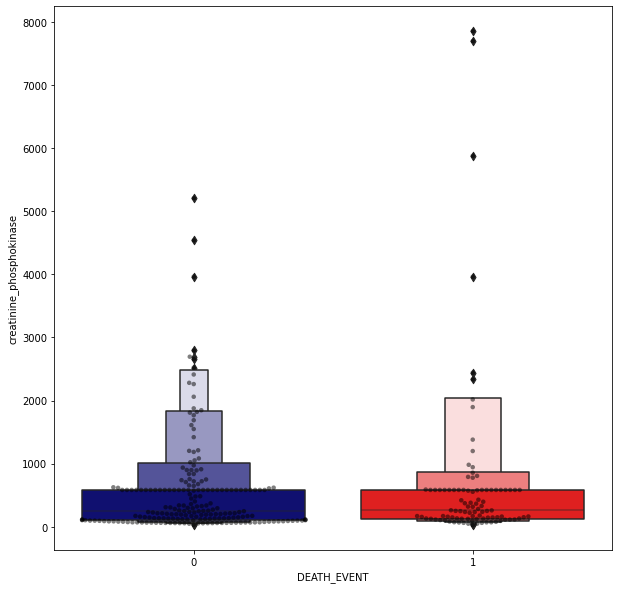

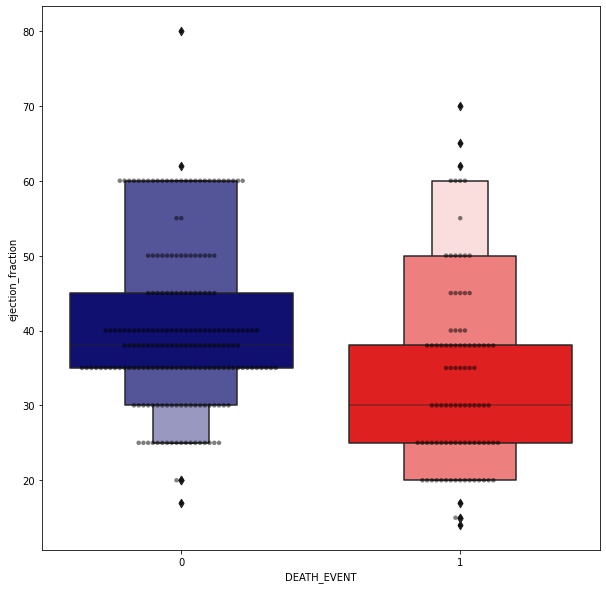

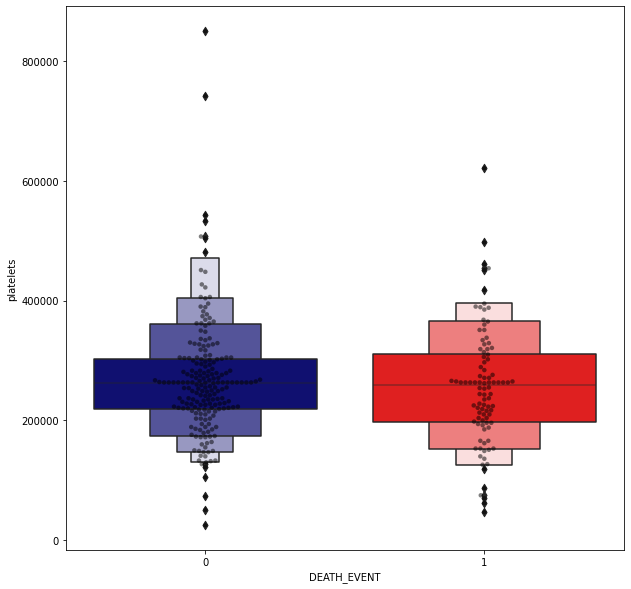

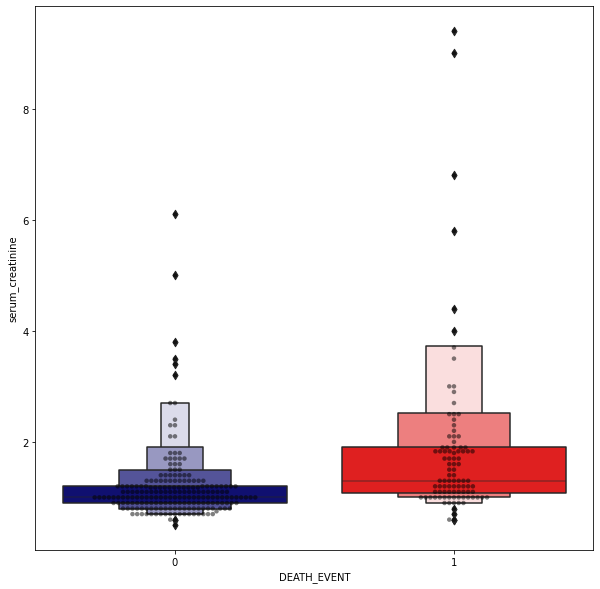

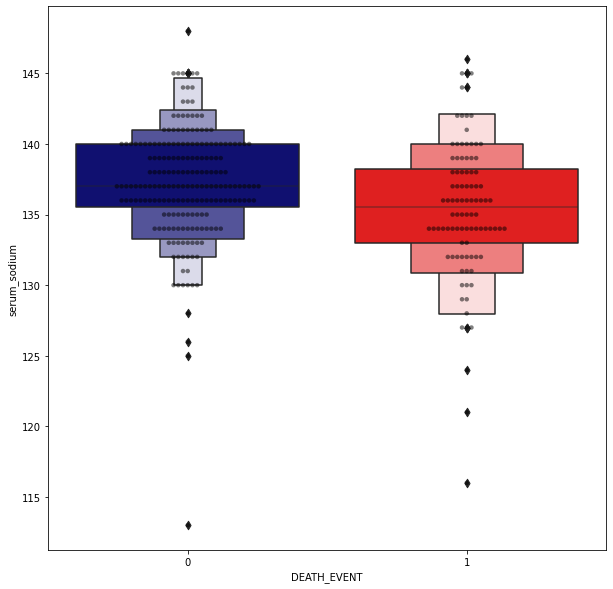

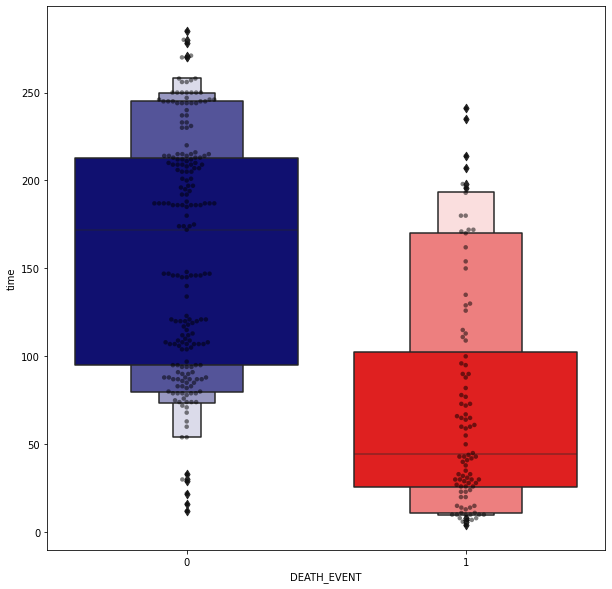

In [28]:
# Boxen and swarm plot of some non binary features.
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize = (10,10))
    sns.swarmplot(x = data["DEATH_EVENT"], y = data[i], marker="o", s=4.5, color = "Black", alpha = 0.5)
    sns.boxenplot(x = data["DEATH_EVENT"], y = data[i], palette = cols)
    plt.show()

<AxesSubplot:xlabel='time', ylabel='age'>

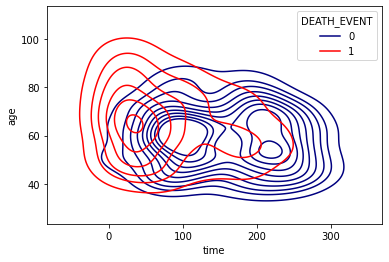

In [36]:
sns.kdeplot(x = data["time"], y = data["age"], hue = data["DEATH_EVENT"], palette = cols)

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# DATA PREPROCESSING

- Dropping the outliers based on data analysis
- Assigning values to features as X and target as y
- Perform the scaling of the features
- Split test and training sets

In [43]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

ERROR! Session/line number was not unique in database. History logging moved to new session 56


In [45]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


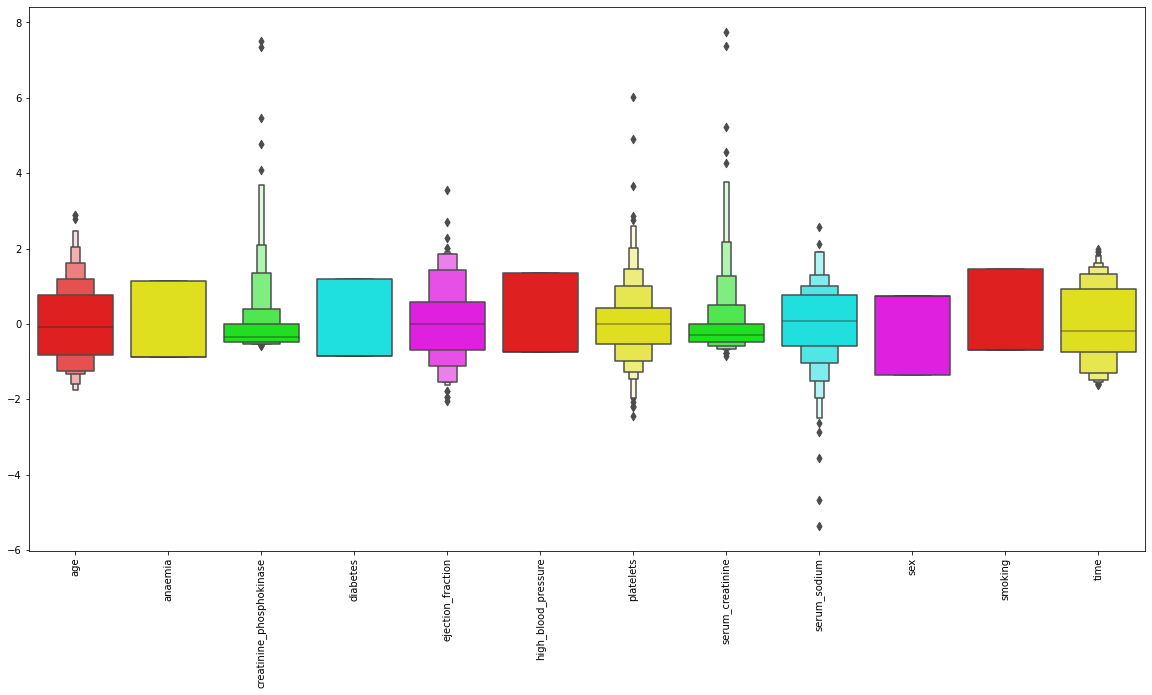

In [48]:
#looking at the scaled features
colours =["#FF0000","#FFFF00","#00FF00" ,"#00FFFF", "#FF00FF"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df, palette = colours)
plt.xticks(rotation = 90)
plt.show()

In [49]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

# MODEL BUILDING

- In this project, we build an artificial neural network.
    - Initialising the ANN
    - Defining by adding layers
    - Compiling the ANN
    - Train the ANN

In [58]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True)

# Initialising the ANN
model = Sequential()

# Layers
model.add(Dense(units = 16, kernel_initializer = "uniform", activation = "relu", input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)


Train on 179 samples, validate on 45 samples
Epoch 1/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.6425 - val_loss: 0.6922 - val_accuracy: 0.6667
Epoch 2/500
179/179 [==============================] - 0s 50us/step - loss: 0.6920 - accuracy: 0.6480 - val_loss: 0.6912 - val_accuracy: 0.6667
Epoch 3/500
179/179 [==============================] - 0s 50us/step - loss: 0.6911 - accuracy: 0.6480 - val_loss: 0.6902 - val_accuracy: 0.6667
Epoch 4/500
179/179 [==============================] - 0s 45us/step - loss: 0.6901 - accuracy: 0.6480 - val_loss: 0.6892 - val_accuracy: 0.6667
Epoch 5/500
179/179 [==============================] - 0s 45us/step - loss: 0.6893 - accuracy: 0.6480 - val_loss: 0.6880 - val_accuracy: 0.6667
Epoch 6/500
179/179 [==============================] - 0s 45us/step - loss: 0.6883 - accuracy: 0.6480 - val_loss: 0.6869 - val_accuracy: 0.6667
Epoch 7/500
179/179 [==============================] - 0s 45us/step - loss: 0.6875 - accurac

In [59]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 77.24%


ERROR! Session/line number was not unique in database. History logging moved to new session 59


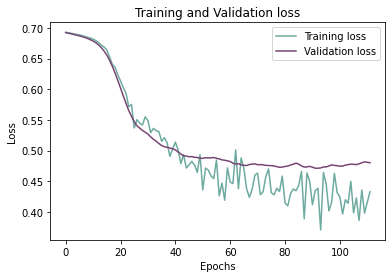

In [61]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

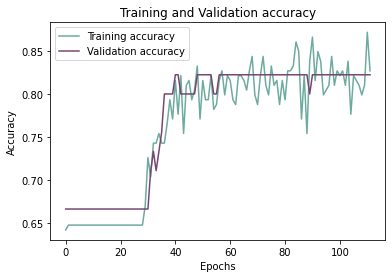

In [62]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# CONCLUSIONS

- Testing on the test set
- Evaluating the confusion matrix
- Evaluating the classification report

In [63]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

<AxesSubplot:>

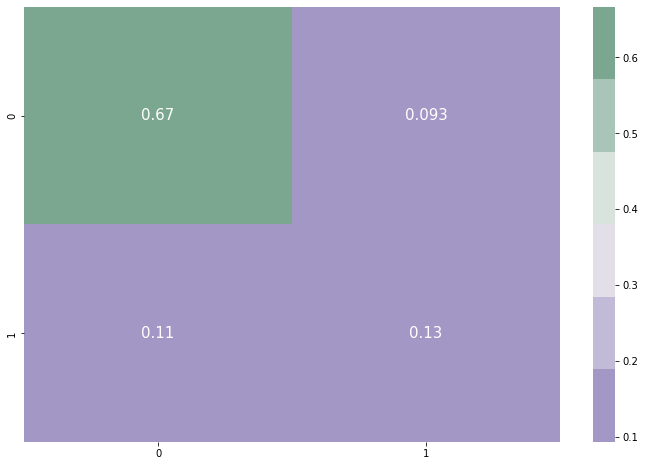

In [64]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        57
           1       0.59      0.56      0.57        18

    accuracy                           0.80        75
   macro avg       0.73      0.72      0.72        75
weighted avg       0.80      0.80      0.80        75

